<a href="https://colab.research.google.com/github/fadindashafira/TIAToolBox/blob/main/04_patch_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patch Extraction from Histology Image

We will use tiatoolbox to **extract patches** from a **large histology image**.

Tiatoolbox can extract patches in different ways, such as:

* Point-based
* Fixed-window
* Variable-window patch extraction

One practical use of these tools is when using deep learning models that **cannot accept large images** in the input. In particular, we will introduce the use of our module [patchextraction](https://github.com/TissueImageAnalytics/tiatoolbox/blob/develop/tiatoolbox/tools/patchextraction.py)

## Setting up the environment

### TIAToolbox and dependencies installation



In [1]:
!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail -n 1
!pip install tiatoolbox | tail -n 1

print("Installation is done.")

Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.30.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 2.0.0 which is incompatible.


Installation is done.


### Importing related libraries

In [4]:
from tiatoolbox.tools import patchextraction # Defines patch extraction methods for DL models
from tiatoolbox.utils.misc import imread # read an image as numpy array
from tiatoolbox.utils.misc import read_locations # read annotations as pandas DataFrame

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300 #  for high resolution figure in noteboo, dpi = dots per inch
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode

## Downloading the Required Files

We download over the internet, a couple of files:

* a histology image
* a csv file

containing the positions of nuclei in that image.

Note: Download is needed once in each Colab session.

In [6]:
import requests # to making http request to interact with websites

img_file_name = "sample_img.png"
csv_file_name = "sample_coordinates.csv"

# Downloading sample image from MoNuSeg
r = requests.get(
    "https://tiatoolbox.dcs.warwick.ac.uk/testdata/patchextraction/TCGA-HE-7130-01Z-00-DX1.png"
)

with open(img_file_name, "wb") as f:
  f.write(r.content)

# Downloading points list
r = requests.get(
  "https://tiatoolbox.dcs.warwick.ac.uk/testdata/patchextraction/sample_patch_extraction.csv"
)

with open(csv_file_name, "wb") as f:
  f.write(r.content)

print("Download is complete")

Download is complete


## Reading Image and Annotation File

We use a sample image from the [MoNuSeg](https://monuseg.grand-challenge.org/Data/) dataset, for which nuclei have already **beeen located (manually)** and **centroids computed.**

The function `read_locations` returns a dataFrame, in which a typical row has the form (x,y,class). Here (x,y) are **coordinates** for a **particular centroid**. And **class** is the type of that **patch**.

For this example, "class" can indicate the **type of nucleus**, such as "epithelial", or "inflammatory".

In the simple situation we are illustrating here, biological information has not been provided, and is replaced by a meaningless number 0.0, which is just a place-holder. Dataframes in Python are handled using pandas. You don't need to learn the details to understand this demo, but, if you want to use dataframes in your own code, or to replace data in this notebook by your own data, you will need to find out more about pandas.

In [8]:
input_img = imread(img_file_name)
centroids_list = read_locations(csv_file_name)

print("Image size: {}".format(input_img.shape))
print("This image has {} point annotations".format(centroids_list.shape[0]))
print("First few lines of dataframe:\n", centroids_list.head())

Image size: (1000, 1000, 3)
This image has 1860 point annotations
First few lines of dataframe:
       x     y  class
0  14.0   3.0    0.0
1   3.0  15.0    0.0
2  13.0  13.0    0.0
3  58.0   8.0    0.0
4  69.0   8.0    0.0


To see better what we are dealing with here, we show the image, first in its original form, and then with the desired centroids overlaid.

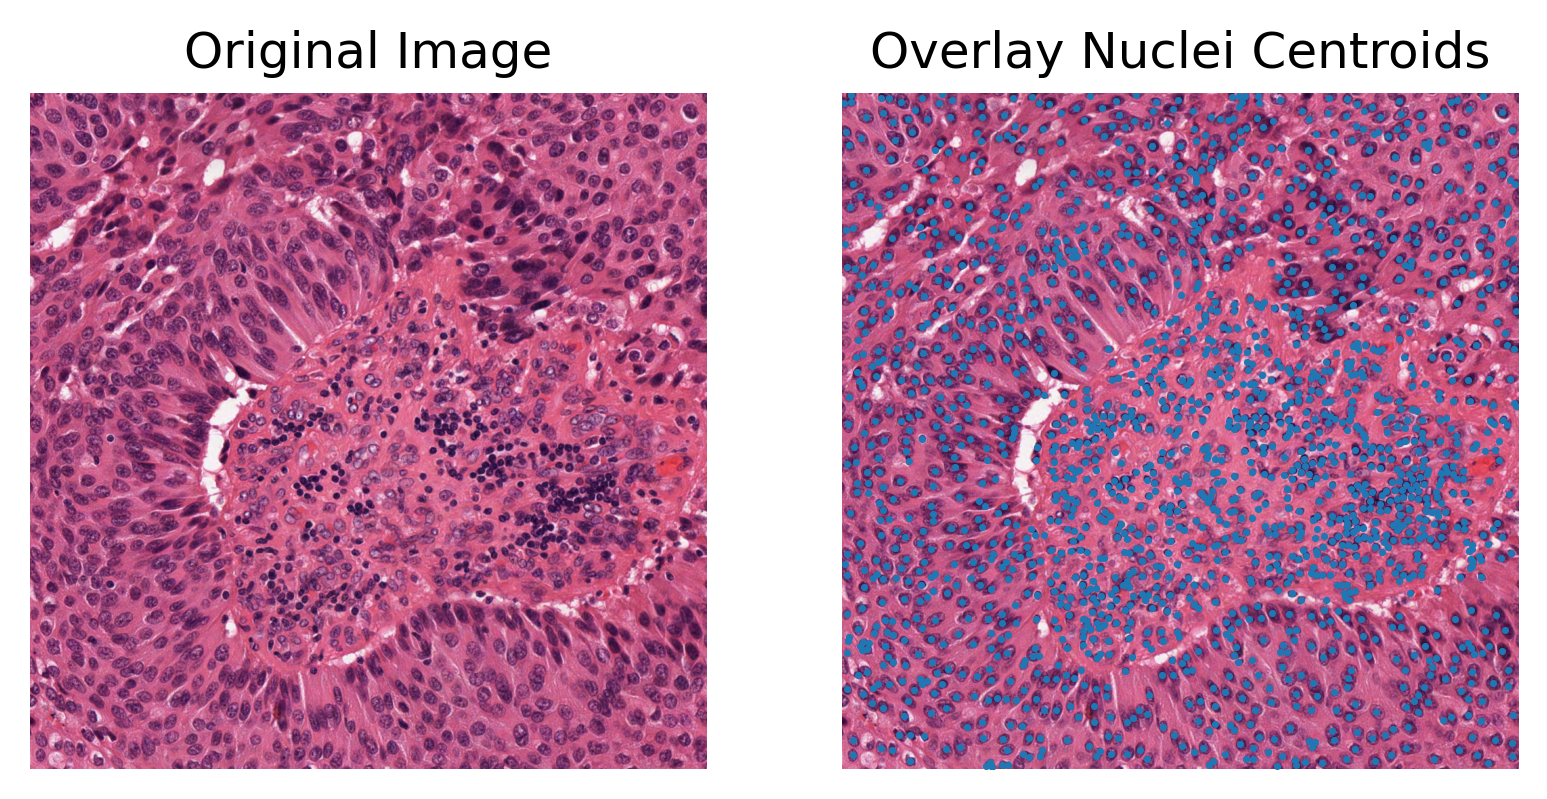

In [14]:
input_img = imread(img_file_name)
plt.subplot(1,2,1)
plt.imshow(input_img)
plt.axis("off")
plt.title("Original Image")

# Overlay nuclei centroids on image and plot
# Use scatter to create A scatter plot of y vs. x with varying marker size and/or color.
plt.subplot(1,2,2)
plt.imshow(input_img)
plt.scatter(np.array(centroids_list)[:,0], np.array(centroids_list)[:, 1], s=0.5)
plt.axis("off")
plt.title("Overlay Nuclei Centroids")
plt.show()